<h1>Download Data</h1>
We use <a href="https://github.com/gulvarol/grocerydataset">Grocery Dataset</a> collected by Idea Teknoloji, Istanbul, Turkey. It contains 354 tobacco shelves images collected from ~40 locations with 4 cameras.<br>
For the sake of clarity create "data" directory with "images" directory inside. Download and unpack grocery dataset images there.<br>
<p>The images dataset can be downloaded using wget and unpacked using tar:</p>
<ul style="list-style-type:none">
    <li>wget https://github.com/gulvarol/grocerydataset/releases/download/1.0/GroceryDataset_part1.tar.gz</li>
    <li>wget https://github.com/gulvarol/grocerydataset/releases/download/1.0/GroceryDataset_part2.tar.gz</li>
    <li>tar -xvzf GroceryDataset_part1.tar.gz</li>
    <li>tar -xvzf GroceryDataset_part2.tar.gz</li>
 </ul>
After downloading and unpacking your nn-grocery-shelves/data/images/ directory should appear as follows:
<ul style="list-style-type:none">
    <li>+ your nn-grocery-shelves/data/images/
         <ul style="list-style-type:none">
            <li>+ BrandImages</li>
            <li>+ BrandImagesFromShelves</li>
            <li>+ ProductImages</li>
            <li>+ ProductImagesFromShelves</li>
            <li>+ ShelfImages</li></ul></li></ul>
<br/>
Unfortunately, some of images are rotated. It can be fixed using following commands:
<ul style="list-style-type:none">
<li>convert C1_P03_N1_S2_1.JPG -rotate 180 C1_P03_N1_S2_1.JPG</li>
<li>convert C1_P03_N1_S2_2.JPG -rotate 180 C1_P03_N1_S2_2.JPG</li>
<li>convert C1_P03_N1_S3_1.JPG -rotate 180 C1_P03_N1_S3_1.JPG</li>
<li>convert C1_P03_N1_S3_2.JPG -rotate 180 C1_P03_N1_S3_2.JPG</li>
<li>convert C1_P03_N1_S4_1.JPG -rotate 180 C1_P03_N1_S4_1.JPG</li>
<li>convert C1_P03_N1_S4_2.JPG -rotate 180 C1_P03_N1_S4_2.JPG</li>
<li>convert C1_P03_N2_S3_1.JPG -rotate 180 C1_P03_N2_S3_1.JPG</li>
<li>convert C1_P03_N2_S3_2.JPG -rotate 180 C1_P03_N2_S3_2.JPG</li>
<li>convert C1_P03_N3_S2_1.JPG -rotate 180 C1_P03_N3_S2_1.JPG</li>
<li>convert C1_P12_N1_S2_1.JPG -rotate 180 C1_P12_N1_S2_1.JPG</li>
<li>convert C1_P12_N1_S3_1.JPG -rotate 180 C1_P12_N1_S3_1.JPG</li>
<li>convert C1_P12_N1_S4_1.JPG -rotate 180 C1_P12_N1_S4_1.JPG</li>
<li>convert C1_P12_N1_S5_1.JPG -rotate 180 C1_P12_N1_S5_1.JPG</li>
<li>convert C1_P12_N2_S2_1.JPG -rotate 180 C1_P12_N2_S2_1.JPG</li>
<li>convert C1_P12_N2_S3_1.JPG -rotate 180 C1_P12_N2_S3_1.JPG</li>
<li>convert C1_P12_N2_S4_1.JPG -rotate 180 C1_P12_N2_S4_1.JPG</li>
<li>convert C1_P12_N2_S5_1.JPG -rotate 180 C1_P12_N2_S5_1.JPG</li>
<li>convert C1_P12_N3_S2_1.JPG -rotate 180 C1_P12_N3_S2_1.JPG</li>
<li>convert C1_P12_N3_S3_1.JPG -rotate 180 C1_P12_N3_S3_1.JPG</li>
<li>convert C1_P12_N3_S4_1.JPG -rotate 180 C1_P12_N3_S4_1.JPG</li>
<li>convert C1_P12_N4_S2_1.JPG -rotate 180 C1_P12_N4_S2_1.JPG</li>
<li>convert C1_P12_N4_S3_1.JPG -rotate 180 C1_P12_N4_S3_1.JPG</li>
<li>convert C3_P07_N1_S6_1.JPG -rotate -90 C3_P07_N1_S6_1.JPG</li></ul>

We'll use data from two folders:
<h3>ShelfImages</h3>
Directory contains JPG files named the same way as C3_P06_N3_S3_1.JPG file:
<ul>
    <li>C3_P06 - shelf id</li>
    <li>N3_S3_1 - planogram id</li>
</ul>
<h3>ProductImagesFromShelves</h3>
Directory contains png files grouped by category named the same way as C1_P01_N1_S2_1.JPG_1008_1552_252_376.png file:
<ul>
    <li>C1_P01_N1_S2_1.JPG - shelf photo file</li>
    <li>1008 - x</li>
    <li>1552 - y</li>
    <li>252 - w</li>
    <li>376 - h</li>
</ul>

In [1]:
import cv2
import pandas as pd
from matplotlib import pyplot as plt
import os
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
data_path = 'data/'
# we'll use data from two folders
shelf_images = 'data/images/ShelfImages/'
product_images = 'data/images/ProductImagesFromShelves/'

In [4]:
# let's get all shelves photo data from ShelfImages
jpg_files = [f for f in os.listdir(f'{shelf_images}') if f.endswith('JPG')]
photos_df = pd.DataFrame([[f, f[:6], f[7:14]] for f in jpg_files], 
                         columns=['file', 'shelf_id', 'planogram_id'])
photos_df.head()

,file,shelf_id,planogram_id
0,C1_P01_N1_S2_1.JPG,C1_P01,N1_S2_1
1,C1_P01_N1_S2_2.JPG,C1_P01,N1_S2_2
2,C1_P01_N1_S3_1.JPG,C1_P01,N1_S3_1
3,C1_P01_N1_S3_2.JPG,C1_P01,N1_S3_2
4,C1_P01_N1_S5_1.JPG,C1_P01,N1_S5_1


In [5]:
# let's get products on shelves photo from ProductImagesFromShelves
products_df = pd.DataFrame(
    [[f[:18], f[:6], f[7:14], i, *map(int, f[19:-4].split('_'))] 
     for i in range(11) 
     for f in os.listdir(f'{product_images}{i}') if f.endswith('png')],
    columns=['file', 'shelf_id', 'planogram_id', 
             'category', 'xmin', 'ymin', 'w', 'h'])
# convert from width height to xmax, ymax
products_df['xmax'] = products_df['xmin'] + products_df['w']
products_df['ymax'] = products_df['ymin'] + products_df['h']
products_df.head()

,file,shelf_id,planogram_id,category,xmin,ymin,w,h,xmax,ymax
0,C1_P01_N1_S2_1.JPG,C1_P01,N1_S2_1,0,1008,1552,252,376,1260,1928
1,C1_P01_N1_S2_1.JPG,C1_P01,N1_S2_1,0,1028,928,252,376,1280,1304
2,C1_P01_N1_S2_1.JPG,C1_P01,N1_S2_1,0,24,872,244,392,268,1264
3,C1_P01_N1_S2_1.JPG,C1_P01,N1_S2_1,0,280,1568,252,376,532,1944
4,C1_P01_N1_S2_1.JPG,C1_P01,N1_S2_1,0,292,872,252,376,544,1248


<h1>Train/Validation/Test Split</h1>
It's a good practice to split the data into three categories: train (neural network training), validation (monitor training process in order not to over fit our nn) and test (apply final performance checks).<br>
For our purposes we will split the data into train/validation in 70/30 ratio.<br>
Please, note that our data contains many photos of each shelf. In order not to full ourselves, we need to split not by products nor planograms, but by shelves.

In [6]:
# get distinct shelves
shelves = list(set(photos_df['shelf_id'].values))
# use train_test_split from sklearn
shelves_train, shelves_validation, _, _ = train_test_split(
    shelves, shelves, test_size=0.3, random_state=6)
# mark all records in data frames with is_train flag
def is_train(shelf_id): return shelf_id in shelves_train
photos_df['is_train'] = photos_df.shelf_id.apply(is_train)
products_df['is_train'] = products_df.shelf_id.apply(is_train)

The dataset contains 11 classes. Class 0 is "garbage" (unclassified data). Class 1 is Marlboro, 2 - Kent, 3 - Camel etc. It's very important that our split contains enough data for training for each class and also enugh data for validation. So, let's visualize our split. Yellow is for training, blue is for testing. If the split is not OK, please, select another random_state and repeat previous step!

In [1]:
df = products_df[products_df.category != 0].\
         groupby(['category', 'is_train'])['category'].\
         count().unstack('is_train').fillna(0)
df.plot(kind='barh', stacked=True)

NameError: name 'products_df' is not defined

In [8]:
# save to pkl
photos_df.to_pickle(f'{data_path}photos.pkl')
products_df.to_pickle(f'{data_path}products.pkl')

In [9]:
# function to display shelf photo with rectangled products
def draw_shelf_photo(file):
    file_products_df = products_df[products_df.file == file]
    coordinates = file_products_df[['xmin', 'ymin', 'xmax', 'ymax']].values
    im = cv2.imread(f'{shelf_images}{file}')
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)    
    for xmin, ymin, xmax, ymax in coordinates:
        cv2.rectangle(im, (xmin, ymin), (xmax, ymax), (0, 255, 0), 5)
    plt.imshow(im)

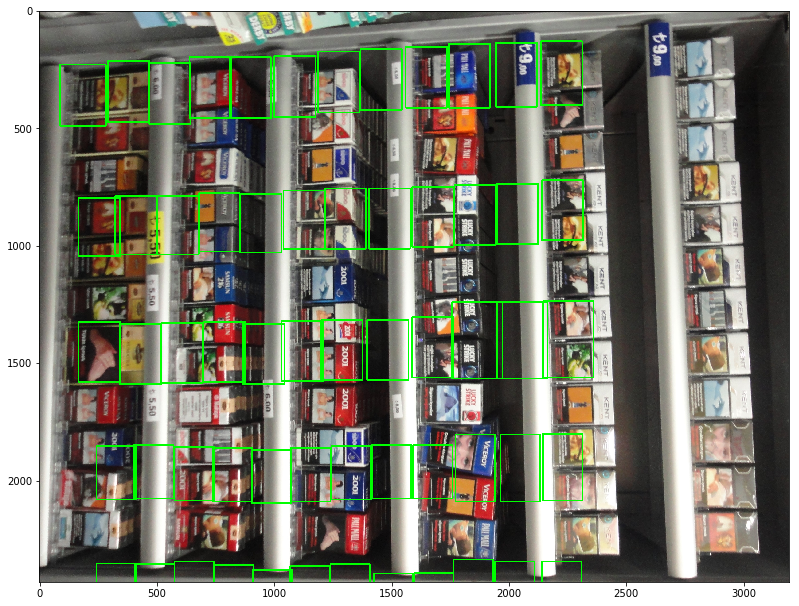

In [10]:
# draw one photo to check our data
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
draw_shelf_photo('C3_P07_N1_S6_1.JPG')